## CLIM 680 Project Part 1:
Create a Jupyter noteboook with documentation regarding the datset in question. Read this dataset into the notebook. Make a contour plot of the first time step. Continue applying techniques covered in class to this dataset.

This scripts covers course material including the calculation of anomalies.  These anomalies are then saved, as they are the required data form for subsequent analyses.

In [1]:
##Import necessary python libraries
import warnings;

import numpy as np; ##Numerical Calculations
import xarray as xr; ##Read netcdf files
import pandas as pd;
import matplotlib.pyplot as plt; ##Plotting

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point

## Create and Use a Function

This function inputs a dataset and outputs the climatology by month.

In [2]:
##This function inputs a dataset and outputs monthly climatologies
def monthly_clim( ds ):
    return ds.groupby( 'time.month' ).mean( dim = 'time' );

## Data
The dataset I have chosen for this analysis will be ocean surface temperature data (tos) taken from pre-industrial model runs contained in the CMIP5 dataset.

Due to the multiude of models available for this dataset, only GFDL's CM3 model will be considered.

This dataset is contained on the COLA server at:/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1

The data is stored in 100 files containing 5 years of data, for a total run length of 500 years. The data is stored using the NetCDF file format.

In [3]:
## Read dataset into notebook   
path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NASA-GISS.GISS-E2-H/r1i1p1/';
file = 'tos_Omon_GISS-E2-H_piControl_r1i1p1_251001-255912.nc'
#mf_file = 'tos_Omon_GISS-E2-H_piControl_r1i1p1_*.nc';
dataset = xr.open_dataset( path + file )
#dataset = xr.open_mfdataset( ( path + mf_file ), concat_dim = 'time' );
print( dataset );
## Note that there is no units attribute for this file.

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 600)
Coordinates:
  * time       (time) object 2510-01-16 12:00:00 ... 2559-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                N/A
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    

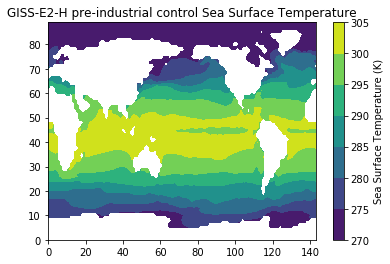

In [4]:
##Make a contour plot of the first time.
plt.contourf( dataset['tos'][0,:,:] );
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );


/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


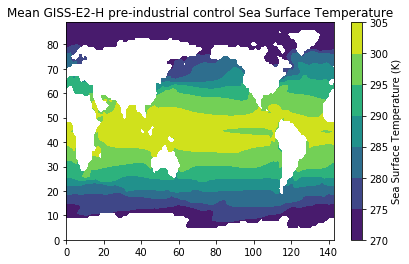

In [5]:
dataset_mean = dataset.mean( dim = 'time' );
plt.contourf( dataset_mean['tos'] );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

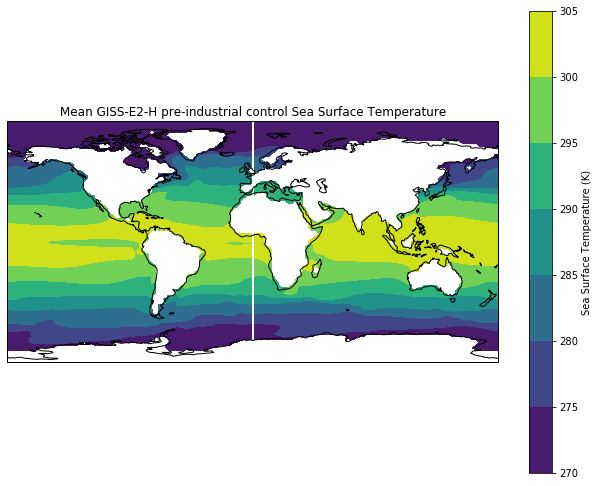

In [6]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset['lon'], dataset['lat'], dataset_mean['tos'], transform = ccrs.PlateCarree() );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

##Add coastlines
ax.coastlines();

##Add a colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

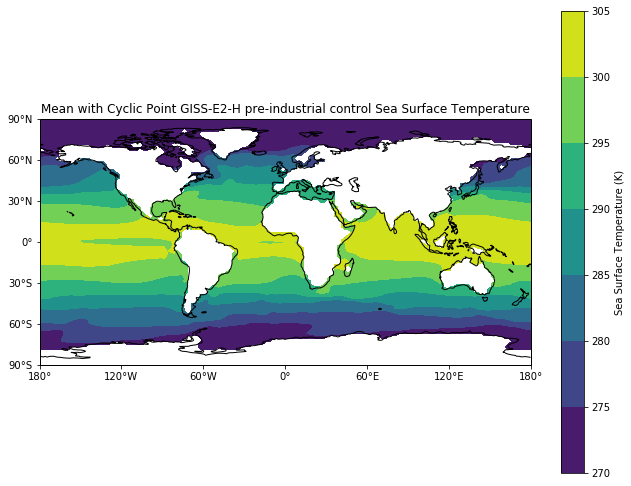

In [7]:
#Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

##Add cyclic point to data
#data = dataset_mean['tos'];
data, lons = add_cyclic_point( dataset_mean['tos'], coord = dataset_mean['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree() );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

#Add coastlines
ax.coastlines();

#Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

#Define the yticks for the latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

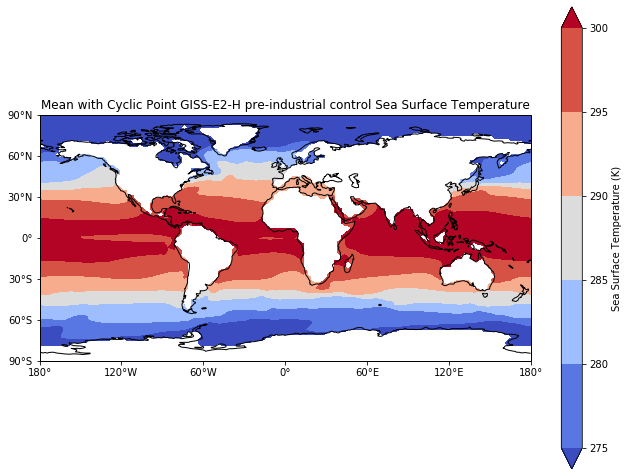

In [8]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
##Add coastlines
ax.coastlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

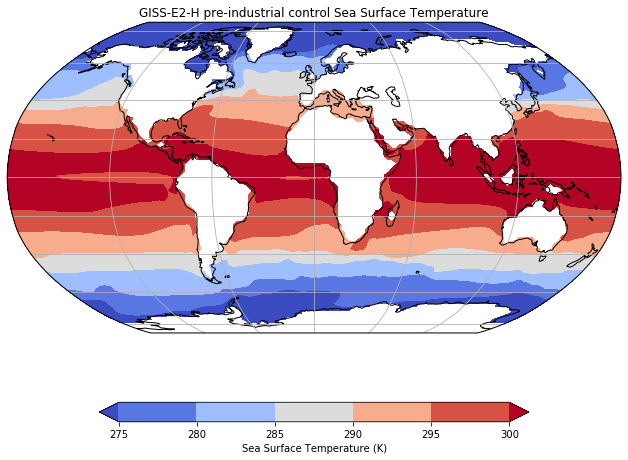

In [9]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.Robinson() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

## Assignment 2:
Apply the techniques covered in class, including longitude shifting, interpolation to a common grid, masking data using boolean arrays, subsetting of data (selecting a reduces set along one dimension), and aggregation (combining data).  Climatology and anomalies should be calculated for some quantity using the groupby() function.  

In [10]:
atmos_path = '/shared/cmip5/data/piControl/atmos/mon/Amon/tas/NASA-GISS.GISS-E2-H/r1i1p1/';
atmos_file = 'tas_Amon_GISS-E2-H_piControl_r1i1p1_251001-255912.nc';
dataset_atmos = xr.open_dataset( atmos_path + atmos_file );
print( dataset_atmos );
#print( dataset );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 600)
Coordinates:
  * time       (time) object 2510-01-16 12:00:00 ... 2559-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                N/A
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                Kenneth Lo

## Longitude Shifting
The ocean dataset is organized on a longitude grid from -280 to 80 and must be shifted to a 0-360 grid 

In [11]:
new_lon = ( dataset['lon'] + 360 ) % 360;
dataset = dataset.assign_coords( lon = new_lon );
dataset = dataset.sortby( dataset['lon'] );
print( dataset );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 600)
Coordinates:
  * time       (time) object 2510-01-16 12:00:00 ... 2559-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 2510-01-01 00:00:00 ... 2560-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    tos        (time, lat, lon) float32 nan nan nan ... 271.28644 271.28644
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                N/A
    parent

## Interpolatation using interp_like()
Interpolate the ocean file to the atmospheric grid.  Due to the interp_like function matching variables by name, the dimension and data variables must be renamed in the atmospheric file.

In [12]:
dataset_interptoatmos = dataset.interp_like( dataset_atmos );
print( dataset_interptoatmos );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 600)
Coordinates:
  * time       (time) object 2510-01-16 12:00:00 ... 2559-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 2510-01-01 00:00:00 ... 2560-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    tos        (time, lat, lon) float64 nan nan nan nan ... 271.3 271.3 271.3
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                N/A
    pare

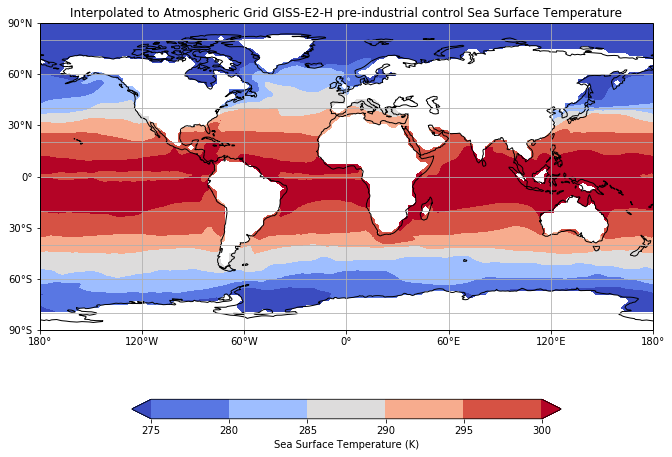

In [13]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

data, lons = add_cyclic_point( dataset['tos'][0,:,:], coord = dataset['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'Interpolated to Atmospheric Grid ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );


## Masking
Load a masking file, interpolate it to the atmospheric file, and mask out the land surface from the atmospheric dataset. 

In [ ]:
#Data has been added over the land. We can mask the land regions out.
mask_file = '/shared/obs/gridded/OISSTv2/lmask/lsmask.nc';
mask = xr.open_dataset( mask_file );
mask = mask.reindex( lat = list( reversed( mask['lat'] ) ) );
#mask = mask.rename( {'lat':'rlat', 'lon':'rlon', 'mask':'tos'} );
mask = mask.squeeze();
print( mask );

In [ ]:
mask_interptoatmos = mask.interp_like( dataset_atmos );
print( mask_interptoatmos );

In [ ]:
atmos_masked = dataset_atmos['tos'].where( mask_interptoatmos['tos'] == 1 )
print( atmos_masked );
#plt.contourf( atmos_masked[0,:,:] );
#plt.colorbar(  shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );
#plt.title( 'Masked Atmospheric Data ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
#print( dataset_atmos );
#print( dataset_atmos['tos'] );

In [ ]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( atmos_masked['rlon'],
                 atmos_masked['rlat'],
                 atmos_masked[0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_atmos['tos'].attrs['long_name'] + ' (' + dataset_atmos['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'Masked ' + dataset_atmos.attrs['model_id'] + ' ' + dataset_atmos.attrs['experiment'] + ' ' + dataset_atmos['tos'].attrs['long_name'] );


In [ ]:
##Just for fun plot a difference in tos and tas

## Subsetting
Extract a subset of the ocean data corresponding to the North Atlantic.

In [ ]:
dataset_na = dataset.sel( rlat = slice( 0, 60 ),
                         rlon = slice( 360-75, 360 ) );
print( dataset_na );

In [ ]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['rlon'],
                 dataset_na['rlat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

In [ ]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['rlon'],
                 dataset_na['rlat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
#ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
#lon_formatter = cticker.LongitudeFormatter();
#ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
#ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
#lat_formatter = cticker.LatitudeFormatter();
#ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

## Aggregate 
Calculate the area average over the North Atlantic Ocean

In [ ]:
nasst_ind = dataset_na['tos'].mean( dim = ( 'rlat', 'rlon' ) );
print( nasst_ind );
plt.plot( nasst_ind );
plt.title( 'North Atlantic SST Index Calculated via Area Averaging' );

In [ ]:
plt.plot( nasst_ind[0:24] );
plt.title( 'First 2 Years of NASST Index' );

## Climatology
Calculate the annual climatology of the NASST Index.  Similarly calculate the annual climatology of the NASST region.

In [ ]:
nasst_ind_clim = monthly_clim( nasst_ind );
print( nasst_ind_clim );
plt.plot( nasst_ind_clim );
plt.title( 'NASST Index Monthly Climatology' );

In [ ]:
nasst_clim = monthly_clim( dataset_na );
print( nasst_clim );
plt.contourf( nasst_clim['tos'][0,:,:] );
plt.colorbar( );
plt.title( 'Janurary NASST SST Climatology' );

In [ ]:
plt.contourf( nasst_clim['tos'][5,:,:] );
plt.colorbar( );
plt.title( 'June NASST SST Climatology' );

## Create a set of subplots that span each monthly climatology

In [ ]:
clevs = np.arange( 270, 310, 3 );

fig,axs = plt.subplots( nrows = 4, ncols = 3,
                      subplot_kw = {'projection':ccrs.PlateCarree() },
                      figsize = ( 11, 8.5) );
axs = axs.flatten();

for i,mon in enumerate(  nasst_clim['month'] ):
    cs = axs[i].contourf( nasst_clim['rlon'], nasst_clim['rlat'],
                        nasst_clim['tos'].sel( month = mon ),
                        clevs, transform = ccrs.PlateCarree(),
                        cmap = 'RdBu_r', extend = 'both' );
    #Longitude Labels
    axs[i].set_xticks( np.arange( -180, 181, 90 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    
    #Latitude Labels 
    axs[i].set_yticks( np.arange( -90, 91, 45 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    
    axs[i].coastlines();
    axs[i].set_title( mon.values );

#Reduce space between figures and leave space for a colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9,
                  left = 0.05, right = 0.95,
                  wspace = 0.05, hspace = 0.35)
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal',
                   label = 'degK' );
plt.suptitle( dataset.attrs['institute_id'] + ' ' + dataset.attrs['experiment_id'] + ' ' + 'Monthly Climatological Sea Surface Temperature' );

In [ ]:
#Copy from assignment 2 to plot all monthly climatologies

## Anomalies
Use the calculated climatologies to calculate the anomalies in the NASST index

In [ ]:
nasst_ind_anom = nasst_ind.groupby( 'time.month' ) - nasst_ind_clim;
print( nasst_ind_anom );

In [ ]:
nasst_anom = dataset_na.groupby( 'time.month' ) - nasst_clim;
print( nasst_anom );

In [ ]:
nasst_anom_ind = nasst_anom.mean( dim = ( 'rlat', 'rlon' ) );
print( nasst_anom_ind );

In [ ]:
##Compare the NASST Index anomalies calculated in the methods
plt.plot( nasst_ind_anom[0:60] );
plt.plot( nasst_anom_ind['tos'][0:60] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );
##Anomalies overlap (orange is the second color, demonstrating the lack of difference between computing anomlies in different orders

In [ ]:
plt.plot( nasst_ind_anom );
plt.plot( nasst_anom_ind['tos'] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );